In [1]:
%matplotlib inline

import math
import random

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.utils.visualize_util import model_to_dot
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
# Number of epoch
NP_EPOCH = 20

In [4]:
# Load data from keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


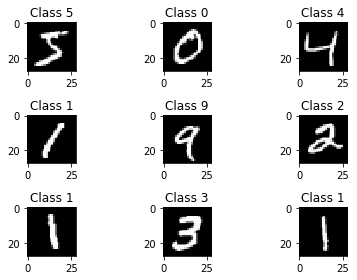

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
plt.tight_layout()

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_train[0])

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [7]:
# Take only 10000 out of 60000

X_train = X_train[0:10000]
X_test = X_test[0:1000]
Y_train = Y_train[0:10000]
Y_test = Y_test[0:1000]

# Table of Content
- Basic Model
- With Cross Entropy
- Deeper Model
- Deeper Model with ReLU
- Adam (Adaptive Learning Rate + Momentum)
- Dropout

# Basic Model

In [8]:
model = Sequential()

# input layer
model.add(Dense(input_dim=28*28, output_dim=500, activation='sigmoid'))

# hidden layer
model.add(Dense(output_dim=500, activation='sigmoid'))

# output layer
model.add(Dense(output_dim=10, activation='softmax'))

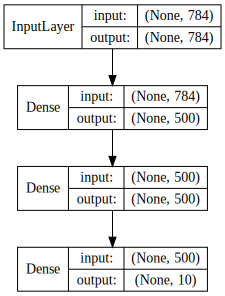

In [9]:
SVG(model_to_dot(model,
                 show_shapes=True,
                 show_layer_names=False).create(prog='dot', format='svg'))

In [10]:
model.compile(loss='mse',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

In [11]:
def train_and_show_result(model):
    training_history = model.fit(X_train, Y_train,
                                 batch_size=100, nb_epoch=NP_EPOCH,
                                 verbose=2)

    score = model.evaluate(X_test, Y_test)
    print("\n--------------------\nTotal Testing Loss: ", score[1], "\nTesting Accuracy: ", score[1])
    return training_history

In [12]:
def plot_training_history(training_history):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].set_xlabel('Epoch')
    axarr[0].set_ylabel('Training Accuracy')
    axarr[0].plot(list(range(1, NP_EPOCH+1)), training_history.history['acc'])
    axarr[1].set_ylabel('Training Error')
    axarr[1].plot(list(range(1, NP_EPOCH+1)), training_history.history['loss'])

In [13]:
%%time
history = train_and_show_result(model)

Epoch 1/20
1s - loss: 0.0903 - acc: 0.1105
Epoch 2/20
1s - loss: 0.0899 - acc: 0.1290
Epoch 3/20
1s - loss: 0.0898 - acc: 0.1360
Epoch 4/20
1s - loss: 0.0897 - acc: 0.1633
Epoch 5/20
1s - loss: 0.0897 - acc: 0.1524
Epoch 6/20
1s - loss: 0.0896 - acc: 0.1815
Epoch 7/20
1s - loss: 0.0895 - acc: 0.2218
Epoch 8/20
1s - loss: 0.0894 - acc: 0.1716
Epoch 9/20
1s - loss: 0.0894 - acc: 0.2083
Epoch 10/20
2s - loss: 0.0893 - acc: 0.2450
Epoch 11/20
2s - loss: 0.0892 - acc: 0.2524
Epoch 12/20
2s - loss: 0.0891 - acc: 0.2671
Epoch 13/20
1s - loss: 0.0891 - acc: 0.2819
Epoch 14/20
2s - loss: 0.0890 - acc: 0.2603
Epoch 15/20
1s - loss: 0.0889 - acc: 0.2808
Epoch 16/20
1s - loss: 0.0888 - acc: 0.2997
Epoch 17/20
2s - loss: 0.0887 - acc: 0.3098
Epoch 18/20
1s - loss: 0.0887 - acc: 0.3099
Epoch 19/20
2s - loss: 0.0886 - acc: 0.3151
Epoch 20/20
2s - loss: 0.0885 - acc: 0.2956
1000/1000 [==============================] - 0s     

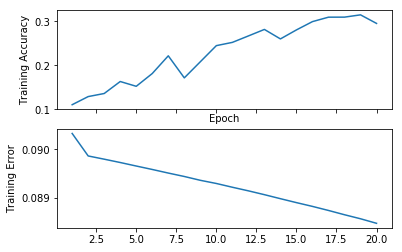

In [14]:
plot_training_history(history)

# Cross Entropy

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

In [16]:
%%time
history = train_and_show_result(model)

Epoch 1/20
2s - loss: 2.2582 - acc: 0.1818
Epoch 2/20
2s - loss: 1.8396 - acc: 0.4324
Epoch 3/20
2s - loss: 1.3142 - acc: 0.6353
Epoch 4/20
2s - loss: 0.9522 - acc: 0.7361
Epoch 5/20
1s - loss: 0.7551 - acc: 0.7971
Epoch 6/20
1s - loss: 0.6333 - acc: 0.8351
Epoch 7/20
2s - loss: 0.5564 - acc: 0.8488
Epoch 8/20
2s - loss: 0.5057 - acc: 0.8604
Epoch 9/20
2s - loss: 0.4641 - acc: 0.8732
Epoch 10/20
1s - loss: 0.4362 - acc: 0.8802
Epoch 11/20
1s - loss: 0.4139 - acc: 0.8864
Epoch 12/20
1s - loss: 0.3939 - acc: 0.8905
Epoch 13/20
2s - loss: 0.3821 - acc: 0.8932
Epoch 14/20
1s - loss: 0.3699 - acc: 0.8964
Epoch 15/20
1s - loss: 0.3587 - acc: 0.8999
Epoch 16/20
1s - loss: 0.3498 - acc: 0.9006
Epoch 17/20
1s - loss: 0.3425 - acc: 0.9012
Epoch 18/20
1s - loss: 0.3342 - acc: 0.9042
Epoch 19/20
1s - loss: 0.3266 - acc: 0.9079
Epoch 20/20
1s - loss: 0.3236 - acc: 0.9080
 960/1000 [===========================>..] - ETA: 0s

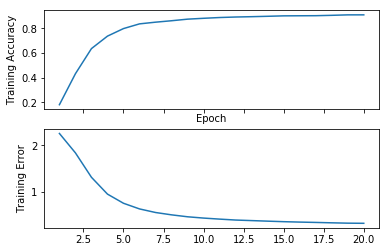

In [17]:
plot_training_history(history)

# Deeper

In [18]:
model = Sequential()

model.add(Dense(input_dim=28*28, output_dim=500, activation='sigmoid'))

model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))

model.add(Dense(output_dim=10, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

In [20]:
%%time
history = train_and_show_result(model)

Epoch 1/20
8s - loss: 2.4371 - acc: 0.0981
Epoch 2/20
6s - loss: 2.3626 - acc: 0.1003
Epoch 3/20
6s - loss: 2.3477 - acc: 0.0997
Epoch 4/20
6s - loss: 2.3375 - acc: 0.0985
Epoch 5/20
7s - loss: 2.3319 - acc: 0.1018
Epoch 6/20
8s - loss: 2.3272 - acc: 0.1037
Epoch 7/20
7s - loss: 2.3263 - acc: 0.1033
Epoch 8/20
6s - loss: 2.3268 - acc: 0.0984
Epoch 9/20
6s - loss: 2.3187 - acc: 0.1015
Epoch 10/20
7s - loss: 2.3181 - acc: 0.1089
Epoch 11/20
6s - loss: 2.3142 - acc: 0.1018
Epoch 12/20
7s - loss: 2.3146 - acc: 0.1029
Epoch 13/20
6s - loss: 2.3137 - acc: 0.1016
Epoch 14/20
6s - loss: 2.3120 - acc: 0.1058
Epoch 15/20
6s - loss: 2.3124 - acc: 0.1032
Epoch 16/20
6s - loss: 2.3107 - acc: 0.1045
Epoch 17/20
6s - loss: 2.3109 - acc: 0.1012
Epoch 18/20
7s - loss: 2.3093 - acc: 0.1042
Epoch 19/20
6s - loss: 2.3095 - acc: 0.1023
Epoch 20/20
6s - loss: 2.3090 - acc: 0.1029
 992/1000 [============================>.] - ETA: 0s

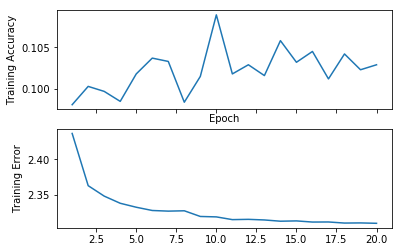

In [21]:
plot_training_history(history)

# ReLU

In [22]:
model = Sequential()

model.add(Dense(input_dim=28*28, output_dim=500, activation='relu'))

model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))

model.add(Dense(output_dim=10, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

In [24]:
%%time
history = train_and_show_result(model)

Epoch 1/20
8s - loss: 1.9295 - acc: 0.3481
Epoch 2/20
8s - loss: 0.7868 - acc: 0.7438
Epoch 3/20
8s - loss: 0.4664 - acc: 0.8639
Epoch 4/20
6s - loss: 0.2514 - acc: 0.9277
Epoch 5/20
6s - loss: 0.1565 - acc: 0.9554
Epoch 6/20
7s - loss: 0.1149 - acc: 0.9674
Epoch 7/20
6s - loss: 0.0878 - acc: 0.9755
Epoch 8/20
6s - loss: 0.0663 - acc: 0.9801
Epoch 9/20
6s - loss: 0.0376 - acc: 0.9897
Epoch 10/20
5s - loss: 0.0293 - acc: 0.9919
Epoch 11/20
5s - loss: 0.0157 - acc: 0.9966
Epoch 12/20
5s - loss: 0.0986 - acc: 0.9781
Epoch 13/20
5s - loss: 0.0174 - acc: 0.9952
Epoch 14/20
6s - loss: 0.0062 - acc: 0.9990
Epoch 15/20
5s - loss: 0.0021 - acc: 0.9998
Epoch 16/20
5s - loss: 0.0013 - acc: 0.9997
Epoch 17/20
5s - loss: 7.3086e-04 - acc: 0.9999
Epoch 18/20
6s - loss: 4.8557e-04 - acc: 1.0000
Epoch 19/20
5s - loss: 3.6850e-04 - acc: 1.0000
Epoch 20/20
6s - loss: 3.0188e-04 - acc: 1.0000
1000/1000 [==============================] - 0s     

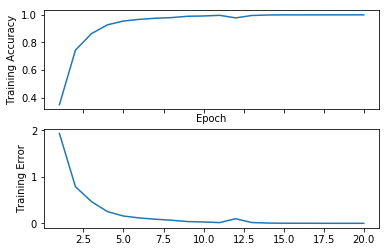

In [25]:
plot_training_history(history)

# Adam (Adaptive Learning Rate + Momentum)

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [27]:
%%time
history = train_and_show_result(model)

Epoch 1/20
8s - loss: 0.2683 - acc: 0.9429
Epoch 2/20
8s - loss: 0.0823 - acc: 0.9769
Epoch 3/20
7s - loss: 0.0709 - acc: 0.9799
Epoch 4/20
7s - loss: 0.0707 - acc: 0.9803
Epoch 5/20
7s - loss: 0.0867 - acc: 0.9776
Epoch 6/20
8s - loss: 0.0599 - acc: 0.9849
Epoch 7/20
7s - loss: 0.0529 - acc: 0.9858
Epoch 8/20
7s - loss: 0.0515 - acc: 0.9869
Epoch 9/20
7s - loss: 0.0535 - acc: 0.9860
Epoch 10/20
8s - loss: 0.0547 - acc: 0.9858
Epoch 11/20
7s - loss: 0.0602 - acc: 0.9872
Epoch 12/20
7s - loss: 0.0490 - acc: 0.9893
Epoch 13/20
7s - loss: 0.0372 - acc: 0.9905
Epoch 14/20
7s - loss: 0.0245 - acc: 0.9944
Epoch 15/20
7s - loss: 0.0340 - acc: 0.9917
Epoch 16/20
7s - loss: 0.0296 - acc: 0.9928
Epoch 17/20
7s - loss: 0.0330 - acc: 0.9922
Epoch 18/20
7s - loss: 0.0510 - acc: 0.9883
Epoch 19/20
7s - loss: 0.0319 - acc: 0.9926
Epoch 20/20
7s - loss: 0.0376 - acc: 0.9912
 992/1000 [============================>.] - ETA: 0s

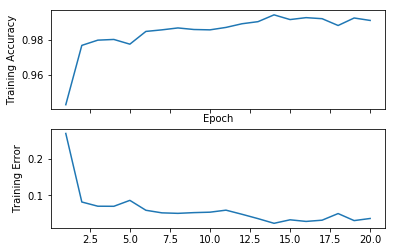

In [28]:
plot_training_history(history)

# Dropout

In [29]:
model = Sequential()

model.add(Dense(input_dim=28*28, output_dim=500, activation='relu'))

model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))

model.add(Dense(output_dim=10, activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [31]:
%%time
history = train_and_show_result(model)

Epoch 1/20
9s - loss: 4.8432 - acc: 0.1033
Epoch 2/20
8s - loss: 2.3042 - acc: 0.1277
Epoch 3/20
8s - loss: 2.1631 - acc: 0.2094
Epoch 4/20
8s - loss: 2.0366 - acc: 0.2359
Epoch 5/20
8s - loss: 1.9533 - acc: 0.2450
Epoch 6/20
10s - loss: 1.8826 - acc: 0.2507
Epoch 7/20
8s - loss: 1.8410 - acc: 0.2527
Epoch 8/20
8s - loss: 1.8115 - acc: 0.2612
Epoch 9/20
9s - loss: 1.7930 - acc: 0.2537
Epoch 10/20
12s - loss: 1.7721 - acc: 0.2645
Epoch 11/20
9s - loss: 1.7390 - acc: 0.2701
Epoch 12/20
8s - loss: 1.7319 - acc: 0.2687
Epoch 13/20
11s - loss: 1.7138 - acc: 0.2745
Epoch 14/20
10s - loss: 1.6979 - acc: 0.2792
Epoch 15/20
9s - loss: 1.7011 - acc: 0.2844
Epoch 16/20
8s - loss: 1.6855 - acc: 0.2812
Epoch 17/20
8s - loss: 1.6703 - acc: 0.2888
Epoch 18/20
9s - loss: 1.6623 - acc: 0.2925
Epoch 19/20
8s - loss: 1.6514 - acc: 0.2930
Epoch 20/20
7s - loss: 1.6401 - acc: 0.2999
1000/1000 [==============================] - 0s     

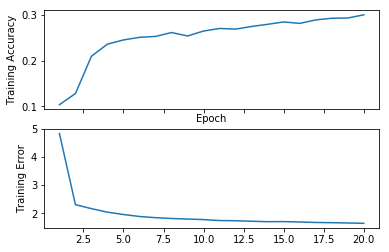

In [32]:
plot_training_history(history)